# Exploring categorical variables

*In this Notebook we will explore relations with categorical (qualitative) variables. We will use a data set on apps on Google Play. This is a sample of the total data set.

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplay.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


A simple overview of a single variable can be easily done using Pandas' value_counts.

In [2]:
pd.value_counts(df["Type"])

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [3]:
pd.value_counts(df["Content Rating"])

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Let's say we are interested to know whether paid apps are marketed more towards mature audiences. We can make a crosstab of the two variables.

In [4]:
pd.crosstab(df["Content Rating"], df["Type"])

Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,8019,695
Everyone 10+,380,33
Mature 17+,479,20
Teen,1156,52
Unrated,2,0


1. It's hard to compare the different categories using absolute numbers. Let's use normalized data (in proportions):
    

In [8]:
pd.crosstab(df["Content Rating"], df["Type"], normalize="index")

Type,Free,Paid
Content Rating,,
Adults only 18+,1.000000,0.000000
Everyone,0.920243,0.079757
Everyone 10+,0.920097,0.079903
Mature 17+,0.959920,0.040080
Teen,0.956954,0.043046
Unrated,1.000000,0.000000


2. Let's make a bar chart out of this data:

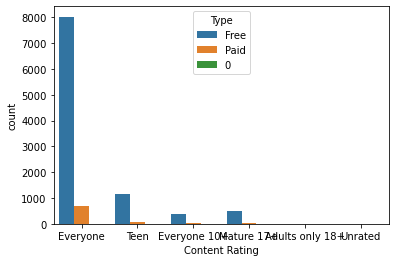

In [5]:
sns.countplot(x="Content Rating", hue="Type", data=df)
plt.show()

3. Create boxplots for Type versus Rating

Verwijder type 0

In [7]:
df=df[df['Type']!='0']
df['Type'].value_counts()


Free    10039
Paid      800
Name: Type, dtype: int64

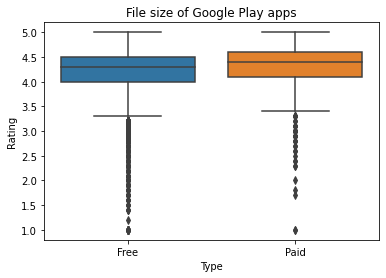

In [8]:
sns.boxplot(x="Type", y="Rating", data=df)
plt.title('File size of Google Play apps')
plt.show()